In [3]:
import cv2
from PIL import Image
import numpy as np


def PrepareYoloImg(img , result):
        # Create a list to store the bounding boxes and class names for the detected objects
    boxes = []
    class_names2 = []
        # img = cv2.imread('untitled.png')
        # Create a new image with the same dimensions as the original image
    new_img = np.zeros_like(img)


        # Get the bounding boxes and scores
    scores = []
    for i in range(len(result.boxes.cls)):
        scores.append(float(result.boxes.cls[i]))

    for j in range(len(result.boxes.xywh)):
        center_x = int(result.boxes.xywh[j][0])
        center_y = int(result.boxes.xywh[j][1])
        w = int(result.boxes.xywh[j][2])
        h = int(result.boxes.xywh[j][3])
        x = int(center_x - w/2)
        y = int(center_y - h/2)
        box = [x, y, w, h]
        boxes.append(box)
        class_names2.append(scores[j])

        # Apply non-maximum suppression
    new_img = Image.fromarray(new_img)
        # Loop over the selected boxes
    for i in range(0,len(boxes)):
        box = boxes[i]
        class_name = class_names2[i]
            
            # Crop the object from the image
        crop_img = img.crop((int(box[0]), int(box[1]), int(box[0])+int(box[2]), int(box[1])+int(box[3])))
            
            # Paste the cropped object onto the new image
        new_img.paste(crop_img, (int(box[0]), int(box[1]), int(box[0])+int(box[2]), int(box[1])+int(box[3])))

        # Save the new image
    return np.asarray(new_img)



(1, 256, 256, 1)



0: 640x640 3 circles, 196.0ms
Speed: 7.0ms preprocess, 196.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1/1 [==============================] - 0s 254ms/step
['traffic_light', 'bicycle', 'house', 'laptop', 'lollipop']


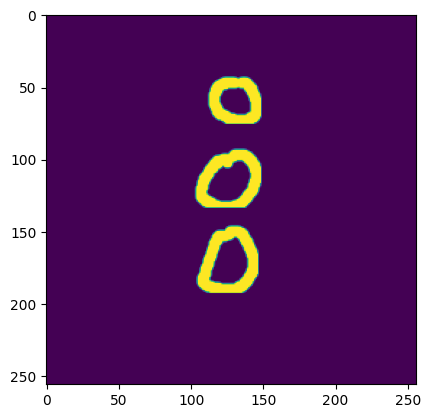

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf

class_names = ['bicycle', 'house' ,'laptop', 'lollipop', 'traffic_light']


img = cv2.imread('Untitled.PNG', cv2.IMREAD_GRAYSCALE)


img = cv2.resize(img, (256,256))
img = np.array(img)
img = img.reshape(-1, 256, 256, 1).astype('float32')
img /=255.0
imgy = Image.fromarray(np.uint8(img.reshape((256, 256))*255))

print(img.shape)
Yolo_Model = YOLO(r'YoloComposedColab100\weights\best.pt')
model = keras.models.load_model(r"SavedModels\ImageAbstractionModel.h5")



result = Yolo_Model.predict(source=imgy, save=False,  conf=0.25, task='detect')[0]

predimg = PrepareYoloImg(imgy, result)

predimg = np.array(predimg)

predimg = predimg.reshape(-1, 256, 256, 1).astype('float32')


prediction = model.predict(predimg)[0]
ind = (-prediction).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)
plt.imshow(predimg.reshape(256,256))
plt.show()
